In [9]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [10]:
well1= pd.read_csv('./Fianl Data modified/well 1.csv')
well2= pd.read_csv('./Fianl Data modified/well 2.csv')
well3= pd.read_csv('./Fianl Data modified/well 3.csv')
well4= pd.read_csv('./Fianl Data modified/well 4.csv')
well5= pd.read_csv('./Fianl Data modified/well 5.csv')
well6= pd.read_csv('./Fianl Data modified/well 6.csv')
well7= pd.read_csv('./Fianl Data modified/well 7.csv')
well8= pd.read_csv('./Fianl Data modified/well 8.csv')

In [11]:
df= pd.concat([well1,well2,well3,well4,well5,well6,well7,well8])

In [12]:
df.shape

(11494, 9)

In [13]:
df

DEPTH        GR    RHOB      Vp       Vsh  Caliper  Porosity  \
0      22.0024   57.3820  1.4506  1.4614  0.033808  11.4844   66.1596   
1      22.1548   58.0070  1.4506  1.4594  0.044766  11.4844   66.1591   
2      22.3072   59.1046  1.4506  1.4577  0.064012  11.4844   66.1585   
3      22.4596   59.2124  1.4506  1.4567  0.065902  11.4844   66.1581   
4      22.6120   59.8294  1.4506  1.4564  0.076721  11.4844   66.1575   
...        ...       ...     ...     ...       ...      ...       ...   
1038  181.3026  105.3357  1.8353  1.4914  0.898063   9.9461   51.5604   
1039  181.4550  103.8500  1.8245  1.4815  0.876908   9.9117   54.9033   
1040  181.6074  103.2400  1.8128  1.4755  0.868221   9.8249   52.2509   
1041  181.7598  102.9838  1.7950  1.4691  0.864573   9.8545   53.2176   
1042  181.9122  102.4681  1.7789  1.4668  0.857230   9.9515   51.5455   

      Resistivity      PP  
0          0.7881  1609.0  
1          0.7751  1609.0  
2          0.7798  1609.0  
3          0.7711  1609.0  
4          0.7446  1609.0  
...           ...     ...  
1038       1.1152  1805.0  
1039       1.1240  1805.0  
1040       1.1346  1803.0  
1041       1.1472  1808.0  
1042       1.1467  1808.0  

[11494 rows x 9 columns]

In [14]:
df.isnull().sum()

DEPTH          0
GR             0
RHOB           0
Vp             0
Vsh            0
Caliper        0
Porosity       0
Resistivity    0
PP             0
dtype: int64

No null values

Outliers

For training data

In [15]:
df.columns

Index(['DEPTH', 'GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity', 'PP'],
      dtype='object')

In [16]:
cols= ['DEPTH', 'GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity', 'PP']

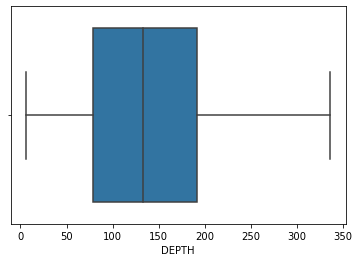

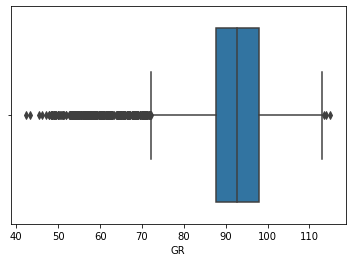

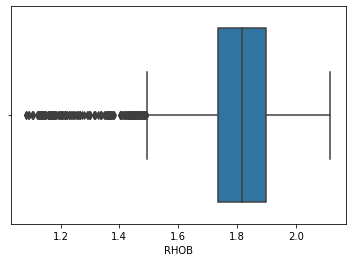

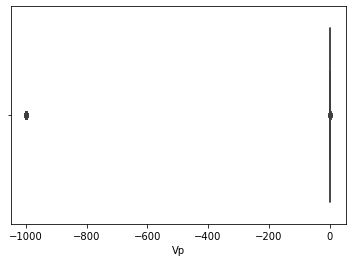

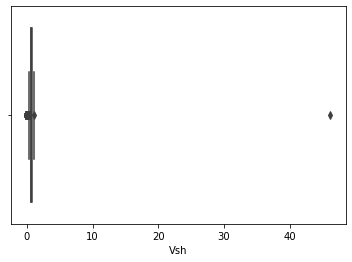

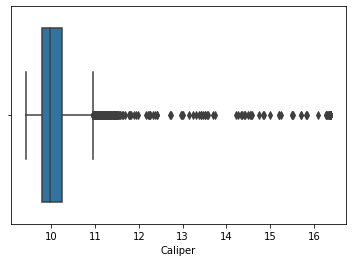

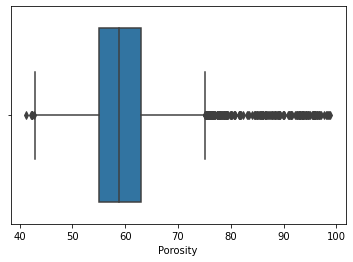

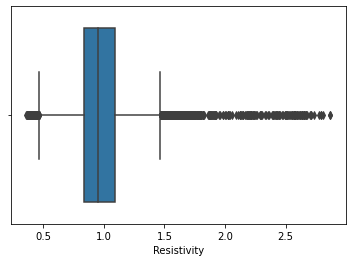

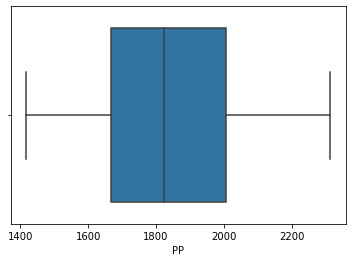

In [17]:
for col in cols :
    plt.figure()
    sns.boxplot(df[col])

In [18]:
# GR

df['GR'][df['GR']<70]= np.nan
# RHOB
df['RHOB'][df['RHOB']<1.5] = np.nan
# Vp
df['Vp'][df['Vp']>1.70] = np.nan
# Vsh
df['Vsh'][df['Vsh']<0.37] = np.nan
# Caliper
df['Caliper'][df['Caliper']>11]= np.nan
# Porosity
df['Porosity'][df['Porosity']>75]= np.nan
# Resistivity
df['Resistivity'][df['Resistivity']>1.5]= np.nan

In [19]:
df= df.dropna()

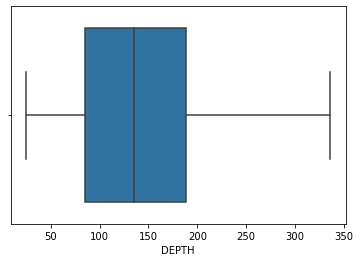

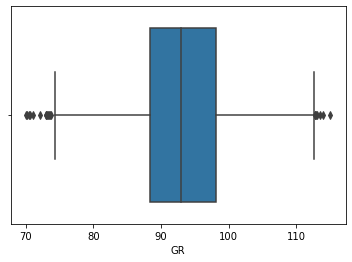

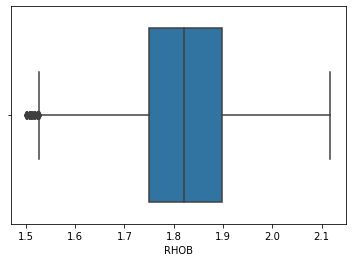

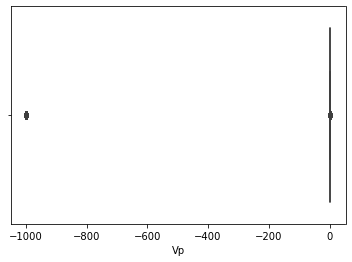

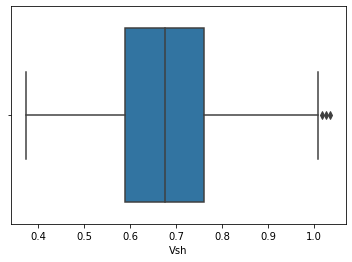

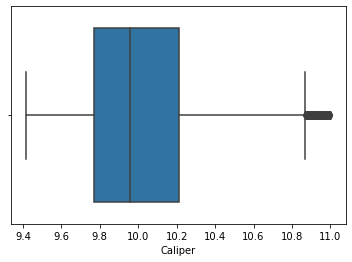

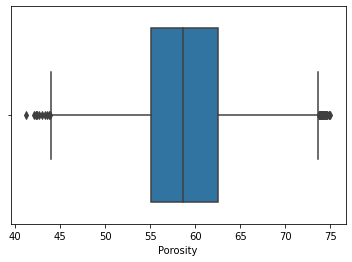

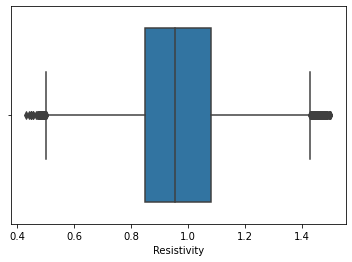

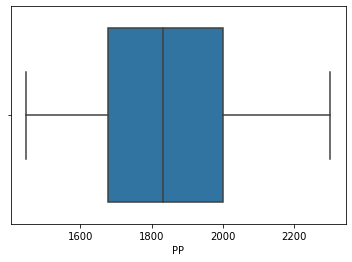

In [20]:
for col in cols :
    plt.figure()
    sns.boxplot(df[col])

Outlier Removed

Shape of train data after outlier removal

In [21]:
print('Train size: ',df.shape)

Train size:  (10408, 9)


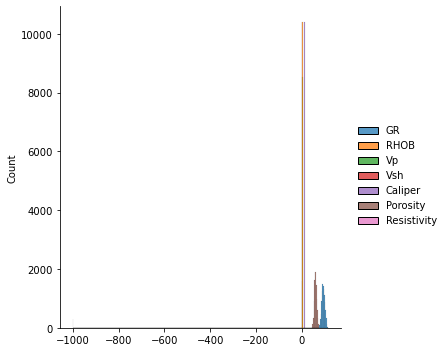

In [22]:
sns.displot(df[['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity']])

Better to scale these values to (0,1)

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
scale= MinMaxScaler()

In [25]:
cols= ['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity']

Train data

In [26]:
scaled= scale.fit_transform(df[['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity']])

In [27]:
scaled_df= pd.DataFrame(scaled,columns= cols)

In [28]:
df= df.reset_index()

In [29]:
scaled_df

GR      RHOB        Vp       Vsh   Caliper  Porosity  Resistivity
0      0.095351  0.087316  0.999789  0.002970  0.937192  0.726727     0.314069
1      0.277994  0.098007  0.999792  0.187648  0.930059  0.804398     0.334395
2      0.146424  0.144986  0.999797  0.230534  0.858793  0.764288     0.363338
3      0.047101  0.162644  0.999799  0.173578  0.860497  0.803269     0.391064
4      0.152046  0.136724  0.999803  0.194618  0.917498  0.804055     0.391907
...         ...       ...       ...       ...       ...       ...          ...
10403  0.785251  0.543010  0.999793  0.792334  0.335059  0.307047     0.641158
10404  0.752223  0.525514  0.999783  0.760394  0.313344  0.405877     0.649401
10405  0.738662  0.506561  0.999777  0.747281  0.258553  0.327461     0.659329
10406  0.732966  0.477726  0.999770  0.741773  0.277238  0.356041     0.671132
10407  0.721502  0.451644  0.999768  0.730686  0.338467  0.306606     0.670663

[10408 rows x 7 columns]

In [30]:
merge= [df['DEPTH'],df['PP'],scaled_df]
pd.concat(merge,axis=1)

DEPTH      PP        GR      RHOB        Vp       Vsh   Caliper  \
0       33.2800  1617.0  0.095351  0.087316  0.999789  0.002970  0.937192   
1       33.4324  1620.0  0.277994  0.098007  0.999792  0.187648  0.930059   
2       35.1088  1621.0  0.146424  0.144986  0.999797  0.230534  0.858793   
3       35.2612  1620.0  0.047101  0.162644  0.999799  0.173578  0.860497   
4       36.0232  1622.0  0.152046  0.136724  0.999803  0.194618  0.917498   
...         ...     ...       ...       ...       ...       ...       ...   
10403  181.3026  1805.0  0.785251  0.543010  0.999793  0.792334  0.335059   
10404  181.4550  1805.0  0.752223  0.525514  0.999783  0.760394  0.313344   
10405  181.6074  1803.0  0.738662  0.506561  0.999777  0.747281  0.258553   
10406  181.7598  1808.0  0.732966  0.477726  0.999770  0.741773  0.277238   
10407  181.9122  1808.0  0.721502  0.451644  0.999768  0.730686  0.338467   

       Porosity  Resistivity  
0      0.726727     0.314069  
1      0.804398     0.334395  
2      0.764288     0.363338  
3      0.803269     0.391064  
4      0.804055     0.391907  
...         ...          ...  
10403  0.307047     0.641158  
10404  0.405877     0.649401  
10405  0.327461     0.659329  
10406  0.356041     0.671132  
10407  0.306606     0.670663  

[10408 rows x 9 columns]

In [31]:
df_scaled= pd.concat(merge,axis=1)

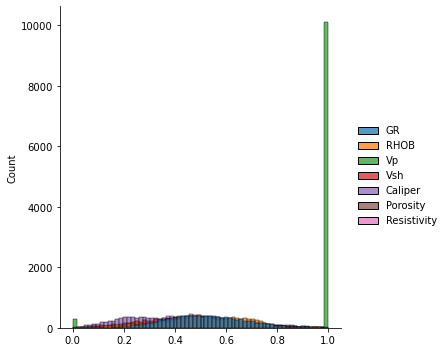

In [32]:
sns.displot(df_scaled[['GR', 'RHOB', 'Vp', 'Vsh', 'Caliper', 'Porosity',
       'Resistivity']])

Our Data is perfect and ready for model development

<Figure size 600x400 with 0 Axes>

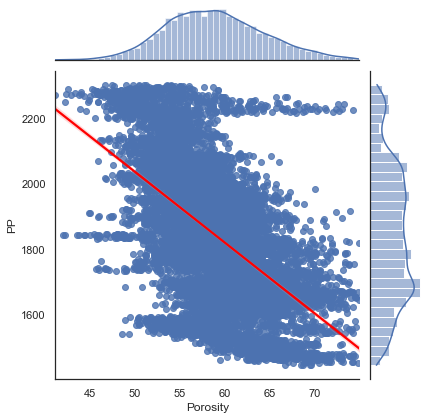

In [33]:
sns.set_theme(style="white")
plt.figure(dpi = (100))
sns.jointplot(x = df['Porosity'], y = df['PP'], kind='reg', line_kws={"color": "red"})

<Figure size 600x400 with 0 Axes>

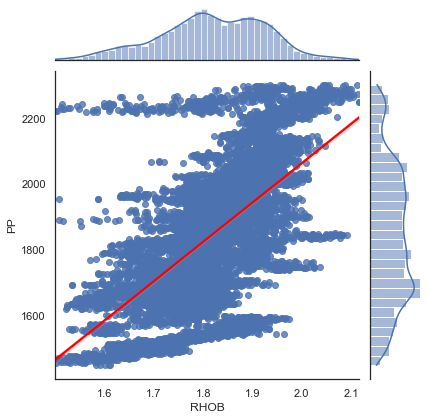

In [34]:
sns.set_theme(style="white")
plt.figure(dpi = (100))
sns.jointplot(x = df['RHOB'], y = df['PP'], kind='reg', line_kws={"color": "red"})

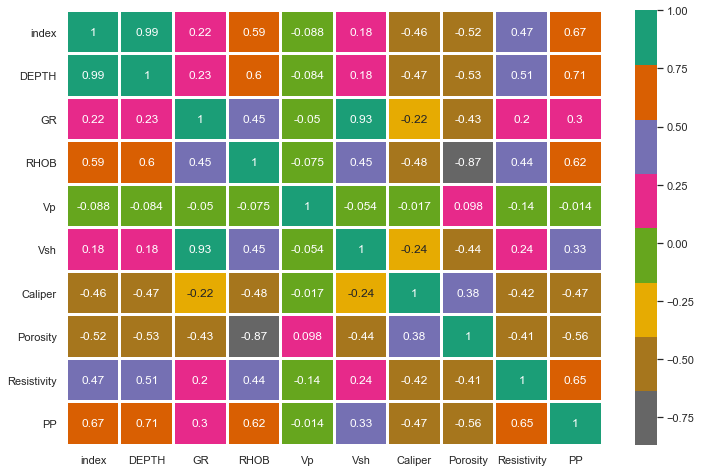

In [35]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

#### Splitting the data

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x= df.drop(['PP','DEPTH'],axis=1) ##independent features
y= df['PP'] ##dependent features

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 42)

In [39]:
x_train= x_train.drop(['index'],axis=1)

In [40]:
x_test= x_test.drop(['index'],axis=1)

In [41]:
print("Training size:",x_train.shape)
print("Testing size:",x_test.shape)

Training size: (9367, 7)
Testing size: (1041, 7)


### We will be using the following models:
- Linear Regression(All kinds)
- Random Forest Regressor
- XGB Regressor
- SVM Regressor
- ANN

#### We will be HyperTuning the top 3 models

## 1)  Regression Models

### 1.1) Multiple Linear Regression

In [38]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept = True, normalize = True)
model.fit(x_train, y_train)
pred = model.predict(x_test)
 
train_score = model.score(x_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(x_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 57.714295653630856
Test score of trained model: 59.47617738697346


In [39]:
print('Linear Model Coefficient (m): ', model.coef_)
print('Linear Model Coefficient (b): ', model.intercept_)

Linear Model Coefficient (m):  [-2.09396620e+00  5.68913888e+02  1.00985558e-01  1.73874713e+02
 -6.29540961e+01 -2.94162081e+00  4.90606531e+02]
Linear Model Coefficient (b):  1217.8638300294956


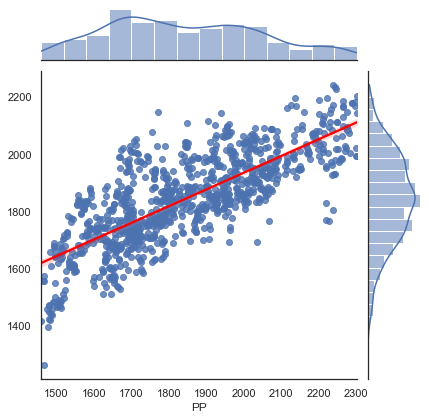

In [40]:
sns.set_theme(style="white")
sns.jointplot(x=y_test, y=pred, kind='reg', line_kws={"color": "red"})

## Plot for observing the predicted and actual values

Evaluation for Simple Multiple Linear Regression model

In [41]:
import sklearn.metrics as metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

k = x_test.shape[1]
n = len(x_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(metrics.mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
MAPE = np.mean(np.abs( (y_test-pred) / y_test))*100
r2_linreg = r2_score(y_test, pred)
adj_r2 = 1-(1-r2_linreg) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, MAPE, r2_linreg, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'MAPE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Metric         Score
0     MSE  17188.479751
1    RMSE    131.104843
2     MAE    104.198082
3    MAPE      5.688206
4      r2      0.594762
5  adj_r2      0.592016

As we see the Simple Linear Regrsession model has not performed well.

Let us shift to Ridge regression

### 1.2) Ridge Regression

In [42]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.001, normalize=True)
ridge.fit(x_train, y_train)

pred = ridge.predict(x_test)

train_score = ridge.score(x_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = ridge.score(x_test, y_test)
print(f'Test score of trained model: {test_score*100}')

Train score of trained model: 57.71423536805401
Test score of trained model: 59.475721459470996


In [43]:
k = x_test.shape[1]
n = len(x_test)

MSE = mean_squared_error(y_test, pred)
RMSE = np.sqrt(mean_squared_error(y_test, pred))
MAE = mean_absolute_error(y_test, pred)
r2_ridge = r2_score(y_test, pred)
adj_r2 = 1-(1-r2_ridge) * (n-1)/(n-k-1)

results = [MSE, RMSE, MAE, r2_ridge, adj_r2]
metrics = ['MSE', 'RMSE', 'MAE', 'r2', 'adj_r2']

table_results = pd.DataFrame({'Metric': metrics, 'Score': results})
table_results

Metric         Score
0     MSE  17188.673136
1    RMSE    131.105580
2     MAE    104.193477
3      r2      0.594757
4  adj_r2      0.592011

Ridge Also did not perform well

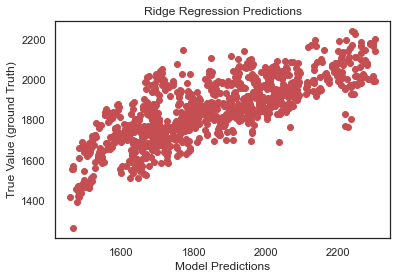

In [44]:
plt.plot(y_test, pred, "o", color = 'r')


plt.xlabel("Model Predictions")
plt.ylabel("True Value (ground Truth)")
plt.title('Ridge Regression Predictions')
plt.show()

## 2) Random Forest Regressor

In [45]:
from sklearn.ensemble import RandomForestRegressor

reg=RandomForestRegressor()

reg.fit(x_train, y_train)

RandomForestRegressor()

In [46]:
pred=reg.predict(x_test)

In [47]:
rf_acc=r2_score(y_test, pred)
print("R^2",rf_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.8848531621451172
Adusted R^2 0.884072883476207
MAE 45.760202284341965
MSE 4884.038482276351
RMSE 69.8858961613597


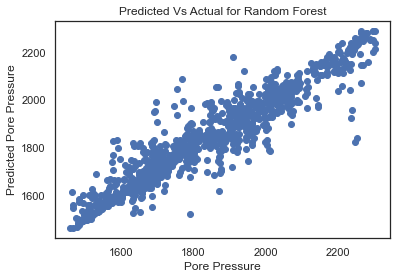

In [48]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for Random Forest")
plt.show()

## 3) XGB Regressor

In [49]:
from xgboost import XGBRegressor

xreg=XGBRegressor()

xreg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [50]:
pred=xreg.predict(x_test)

In [51]:
xgb_acc=r2_score(y_test, pred)
print("R^2",rf_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.8848531621451172
Adusted R^2 0.8605950456192298
MAE 56.148000487812205
MSE 5873.165677125428
RMSE 76.63658184656613


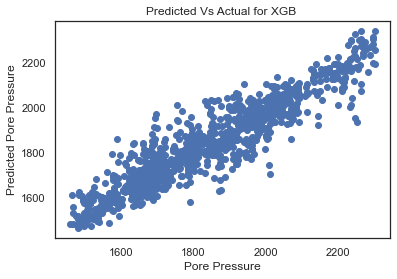

In [52]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for XGB ")
plt.show()

## 3) SVM Regressor

In [53]:
from sklearn import svm

regg=svm.SVR()

In [54]:
regg.fit(x_train,y_train)

SVR()

In [55]:
pred=regg.predict(x_test)

In [56]:
regg_acc=r2_score(y_test, pred)
print("R^2",regg_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.0501866749671086
Adusted R^2 0.0437503794441364
MAE 167.5149798673863
MSE 40287.03624745509
RMSE 200.71630787620396


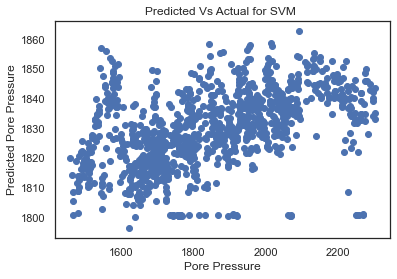

In [57]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for SVM ")
plt.show()

## 5) ANN

In [5]:
from tensorflow import keras

In [60]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor

seed = 7
np.random.seed(seed)

# Model
model = Sequential()
model.add(Dense(200, input_dim=7, kernel_initializer='normal', activation='relu'))
model.add(Dense(100, kernel_initializer='normal', activation='relu'))
model.add(Dense(50, kernel_initializer='normal', activation='relu'))
model.add(Dense(25, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
# Compile model
model.compile(loss='mean_squared_error')

feature_cols = x_train
labels = y_train.values

model.fit(np.array(feature_cols), np.array(labels), epochs=100, batch_size=10)

Epoch 1/100
937/937 [==============================] - 15s 1ms/step - loss: 565528.1172
Epoch 2/100
937/937 [==============================] - 1s 1ms/step - loss: 46136.8474
Epoch 3/100
937/937 [==============================] - 1s 1ms/step - loss: 41638.8599
Epoch 4/100
937/937 [==============================] - 1s 1ms/step - loss: 40839.5550
Epoch 5/100
937/937 [==============================] - 1s 1ms/step - loss: 37773.4918
Epoch 6/100
937/937 [==============================] - 1s 1ms/step - loss: 31827.3905
Epoch 7/100
937/937 [==============================] - 1s 1ms/step - loss: 29595.0905A: 0s - loss: 29808.
Epoch 8/100
937/937 [==============================] - 1s 1ms/step - loss: 26203.0377
Epoch 9/100
937/937 [==============================] - 1s 1ms/step - loss: 26188.8221
Epoch 10/100
937/937 [==============================] - 1s 1ms/step - loss: 25799.8433
Epoch 11/100
937/937 [==============================] - 1s 1ms/step - loss: 26525.2828
Epoch 12/100
937/937 [========

In [61]:
pred= model.predict(x_test)

In [62]:
ann_acc=r2_score(y_test, pred)
print("R^2",ann_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred))
print("MSE", mean_squared_error(y_test, pred))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred)))

R^2 0.6422117594354709
Adusted R^2 0.6397872505449078
MAE 95.53765829862361
MSE 15175.853440503386
RMSE 123.19031390699264


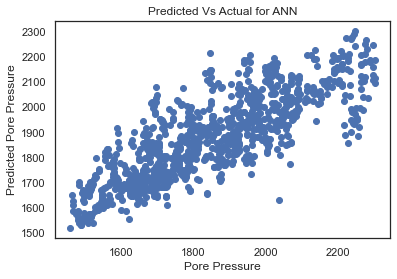

In [63]:
# visualize the difference between the actual and predicted price 
plt.scatter(y_test, pred)
plt.xlabel("Pore Pressure")
plt.ylabel("Predicted Pore Pressure")
plt.title("Predicted Vs Actual for ANN")
plt.show()

In [64]:
models=pd.DataFrame({
    'Model':['Linear Regression','Ridge Regression', 'Random Forest', 'XGBoost', 'Support Vector Machine', 'ANN'],
    'R_squared Score':[r2_linreg*100,r2_ridge*100, rf_acc*100, xgb_acc*100, regg_acc*100, ann_acc*100]
})
models.sort_values(by='R_squared Score', ascending=False)


Model  R_squared Score
2           Random Forest        88.485316
3                 XGBoost        86.153335
5                     ANN        64.221176
0       Linear Regression        59.476177
1        Ridge Regression        59.475721
4  Support Vector Machine         5.018667

## Hypertuning top 3 performing models

### 1) Random Forest Regressor

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
rf = RandomForestRegressor(random_state = 42)

In [60]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


Defining the parameters

In [61]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [65]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
#rf_random.fit(x_train,y_train)

In [66]:
#rf_random.best_params_

In [67]:
rf_tuned= RandomForestRegressor(n_estimators= 800,
 min_samples_split= 2,
 min_samples_leaf= 1,
 max_features='auto',
 max_depth=100,
 bootstrap= True)

In [68]:
y_train

6885    1901.0000
3181    1729.0000
9516    1571.9880
6039    1611.9919
4329    2042.0000
          ...    
5734    1529.5000
5191    1645.4940
5390    1690.5000
860     1854.0000
7270    1999.0000
Name: PP, Length: 9367, dtype: float64

In [69]:
rf_tuned.fit(x_train,y_train)

RandomForestRegressor(max_depth=100, n_estimators=800)

In [70]:
pred_tunedrf= rf_tuned.predict(x_test)

In [71]:
rftuned_acc=r2_score(y_test, pred_tunedrf)
print("R^2",rftuned_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred_tunedrf))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred_tunedrf))
print("MSE", mean_squared_error(y_test, pred_tunedrf))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred_tunedrf)))

R^2 0.884536693535493
Adusted R^2 0.8837542703551914
MAE 45.738382063760916
MSE 4897.461732941599
RMSE 69.98186717244403


In [70]:
depth= np.linspace(30,300,len(x_test))

In [71]:
x_testplot= x_test.copy()

In [72]:
x_testplot['Depth']= depth


In [73]:
x_testplot['Acutal PP']= y_test

In [74]:
x_testplot['Predicted PP']= pred_tunedrf

NameError: name 'pred_tunedrf' is not defined

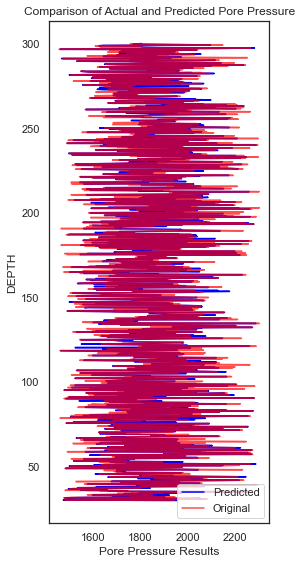

In [77]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted Pore Pressure')
ax1.plot(x_testplot["Predicted PP"], x_testplot["Depth"],  color = 'blue', label='Predicted')
ax1.plot(x_testplot["Acutal PP"], x_testplot["Depth"],  color = 'red', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('Pore Pressure Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()

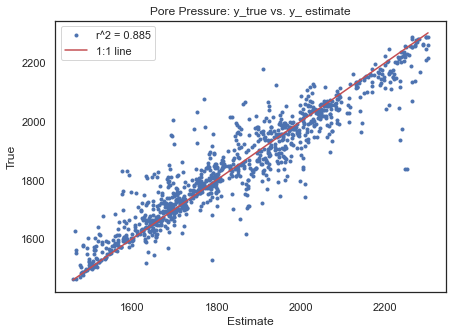

In [78]:
plt.figure(figsize=(7,5))
plt.plot(y_test, pred_tunedrf, '.', label = 'r^2 = %.3f' % (r2_score(y_test, pred_tunedrf)))
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r', label = '1:1 line')
plt.title('Pore Pressure: y_true vs. y_ estimate'); plt.xlabel('Estimate'); plt.ylabel('True')
plt.legend()

In [84]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, random_state=1)


predictions = []
scores=[]
for train, test in kf.split(x_test):
    # The predictors we're using the train the algorithm.
    train_predictors = x_train
    # The target we're using to train the algorithm.
    train_target = y_train
    # Training the algorithm using the predictors and target.
    rf_tuned.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = rf_tuned.predict(x_test)
    predictions.append(test_predictions)
    score = np.mean(cross_val_score(rf, x_train, y_train , cv=10))
    val_score= cross_val_score(rf, x_train, y_train , cv=10)
    
print (score)
print(val_score)

IndentationError: unexpected indent (<ipython-input-84-7d11b9c6fca9>, line 11)

In [ ]:
fr_val_score= val_score

In [ ]:
rf_score_df= pd.DataFrame(fr_val_score)
rf_score_df= rf_score_df.reset_index()
rf_score_df

In [ ]:
plt.plot(rf_score_df)
plt.title('R2 Score with 10 CV Folds')
plt.xlabel('Cross Validation')
plt.ylabel('R2 Score')
plt.grid()

### 2) XG Boost Regressor

In [79]:
xgbr=XGBRegressor()

In [86]:
params = { 'max_depth': [3, 5, 6, 10, 15, 20],
           'learning_rate': [0.01, 0.1, 0.2, 0.3],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'n_estimators': [100, 500, 1000]}

In [ ]:
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=1)

In [ ]:
clf.fit(x_train,y_train)

In [ ]:
clf.best_params_

In [80]:
xgb_tuned= XGBRegressor(subsample= 0.7,
 n_estimators=500,
max_depth=15,
 learning_rate= 0.1,
 colsample_bytree= 0.7999999999999999,
 colsample_bylevel= 0.6)

In [81]:
xgb_tuned.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=0.6,
             colsample_bynode=1, colsample_bytree=0.7999999999999999, gamma=0,
             gpu_id=-1, importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=15,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=500, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.7,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [82]:
pred_tunedxgb= xgb_tuned.predict(x_test)

In [83]:
xgbtuned_acc=r2_score(y_test, pred_tunedxgb)
print("R^2",xgbtuned_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, pred_tunedxgb))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, pred_tunedxgb))
print("MSE", mean_squared_error(y_test, pred_tunedxgb))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred_tunedxgb)))

R^2 0.8818958221758041
Adusted R^2 0.8810955034490187
MAE 48.99223515137188
MSE 5009.476249256131
RMSE 70.77765360095043


In [84]:
x_testplot['Predicted PP xgb']= pred_tunedxgb

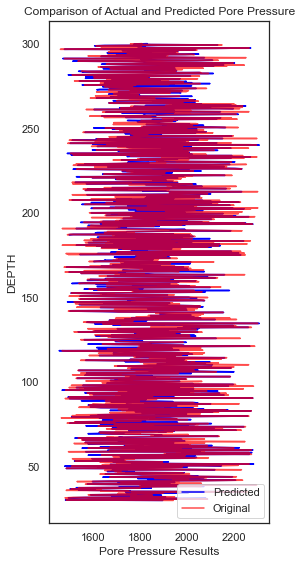

In [85]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted Pore Pressure')
ax1.plot(x_testplot["Predicted PP xgb"], x_testplot["Depth"],  color = 'blue', label='Predicted')
ax1.plot(x_testplot["Acutal PP"], x_testplot["Depth"],  color = 'red', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('Pore Pressure Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()

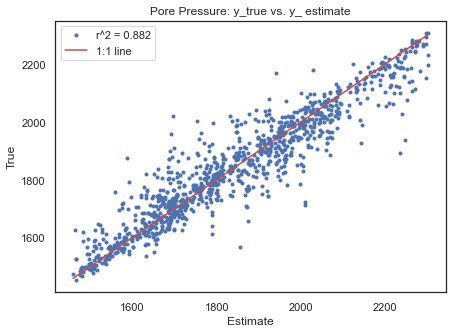

In [86]:
plt.figure(figsize=(7,5))
plt.plot(y_test, pred_tunedxgb, '.', label = 'r^2 = %.3f' % (r2_score(y_test, pred_tunedxgb)))
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()], 'r', label = '1:1 line')
plt.title('Pore Pressure: y_true vs. y_ estimate'); plt.xlabel('Estimate'); plt.ylabel('True')
plt.legend()

In [94]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=6, random_state=1)


predictions = []
scores=[]
for train, test in kf.split(x_test):
    # The predictors we're using the train the algorithm.
    train_predictors = x_train
    # The target we're using to train the algorithm.
    train_target = y_train
    # Training the algorithm using the predictors and target.
    xgb_tuned.fit(train_predictors, train_target)
    # We can now make predictions on the test fold
    test_predictions = xgb_tuned.predict(x_test)
    predictions.append(test_predictions)
    score = np.mean(cross_val_score(xgb_tuned, x_train, y_train , cv=10))
    val_score= cross_val_score(xgb_tuned, x_train, y_train , cv=10)
    
print (score)
print(val_score)

IndentationError: unexpected indent (<ipython-input-94-f09528461ea9>, line 11)

In [ ]:
xgb_score_df= pd.DataFrame(val_score)
rf_score_df= rf_score_df.reset_index()
xgb_score_df

In [ ]:
plt.plot(xgb_score_df)
plt.title('R2 Score with 10 CV Folds')
plt.xlabel('Cross Validation')
plt.ylabel('R2 Score')
plt.grid()

In [110]:
pip install bayesian-optimization

  Created wheel for bayesian-optimization: filename=bayesian_optimization-1.2.0-py3-none-any.whl size=11685 sha256=49673404d128d99c8c1f1358c1a557081df689eec0f48f2080ae3fef5306af8c
  Stored in directory: c:\users\khank\appdata\local\pip\cache\wheels\37\fa\19\f93e793d3944567a60b3ab93b446cf7370cc82c60c1d1c613f
Successfully built bayesian-optimization
Note: you may need to restart the kernel to use updated packages.


### 3) Using PyCaret

In [7]:
from pycaret.regression import *

In [44]:
df=  df.drop(['index'],axis=1)

In [52]:
df=  df.drop(['DEPTH'],axis=1)

In [53]:
model= setup(data= df, target= 'PP',normalize= True,remove_outliers=True,trigonometry_features=True,profile=True)

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [54]:
compare_models()

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=-1, oob_score=False,
                    random_state=2420, verbose=0, warm_start=False)

In [55]:
et= create_model('et')

In [56]:
tuned_et= tune_model(et)

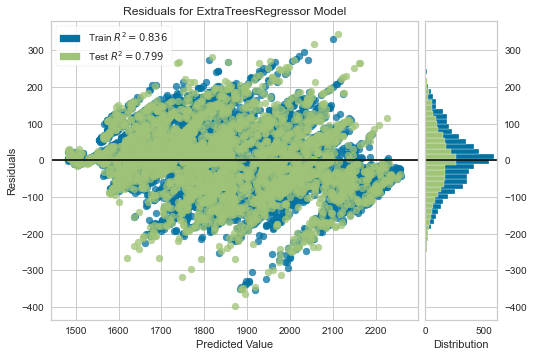

In [57]:
plot_model(tuned_et)

In [59]:
predictions= tuned_et.predict(x_test)

In [67]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

In [68]:
et_acc=r2_score(y_test, predictions)
print("R^2",et_acc)
print("Adusted R^2", 1-(1-r2_score(y_test, predictions))*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1))
print("MAE", mean_absolute_error(y_test, predictions))
print("MSE", mean_squared_error(y_test, predictions))
print("RMSE",np.sqrt(mean_squared_error(y_test, predictions)))

R^2 -0.9687739178951409
Adusted R^2 -0.9821150770677118
MAE 242.63570994055996
MSE 83507.00511654651
RMSE 288.97578638451097


In [76]:
x_testplot['Predicted PP et']= predictions

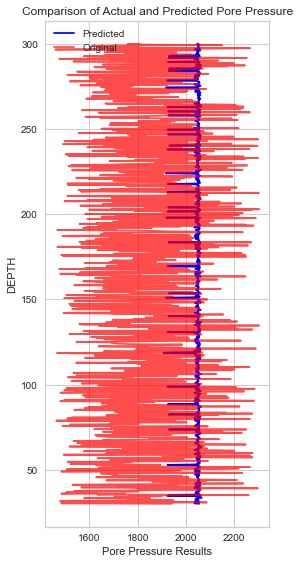

In [77]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(111)
plt.title('Comparison of Actual and Predicted Pore Pressure')
ax1.plot(x_testplot["Predicted PP et"], x_testplot["Depth"],  color = 'blue', label='Predicted')
ax1.plot(x_testplot["Acutal PP"], x_testplot["Depth"],  color = 'red', alpha = 0.7, label='Original')
ax1.legend()
plt.xlabel('Pore Pressure Results')
plt.ylabel('DEPTH')
plt.tight_layout()
plt.show()